In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns

In [32]:
#importing the MNIST dataset
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [33]:
#Checking the shape of the dataset
(X_train.shape,Y_train.shape),(X_test.shape,Y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [34]:
#Scaling the images
X_train=X_train/255
X_test=X_test/255

In [35]:
#Create a Neural Network Model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [37]:
#Train the model
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3447 - accuracy: 0.9042 - val_loss: 0.1713 - val_accuracy: 0.9543
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1747 - accuracy: 0.9493 - val_loss: 0.1331 - val_accuracy: 0.9642
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1287 - accuracy: 0.9617 - val_loss: 0.1173 - val_accuracy: 0.9663
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1023 - accuracy: 0.9694 - val_loss: 0.1079 - val_accuracy: 0.9697
Epoch 5/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0859 - accuracy: 0.9741 - val_loss: 0.1012 - val_accuracy: 0.9710


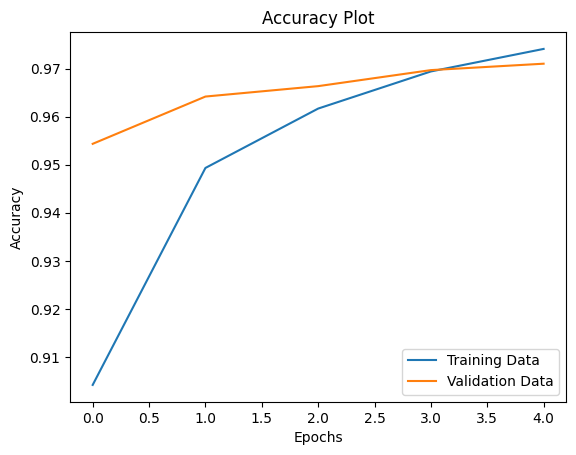

In [38]:
#Plot the accuracy plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Data','Validation Data'],loc='lower right')

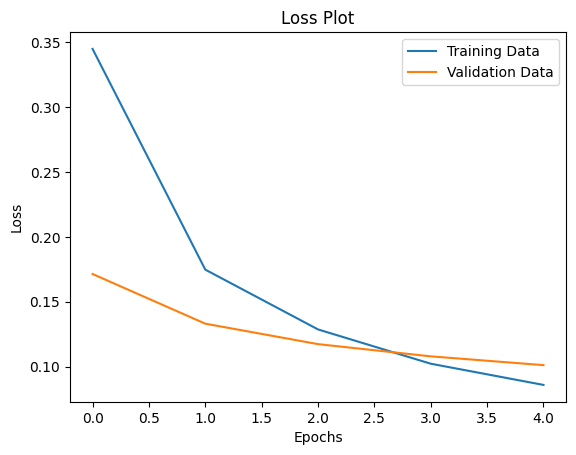

In [39]:
#Plot the loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Data','Validation Data'],loc='upper right')

In [40]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1082 - accuracy: 0.9676
0.10820363461971283
0.9675999879837036


In [41]:
Y_pred=model.predict(X_test)
Y_pred_label=[np.argmax(i) for i in Y_pred]
print(Y_pred_label)
print(Y_test)

313/313 [==============================] - 1s 1ms/step
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1,

Text(0.5, 1.0, 'Confusion Matrix')

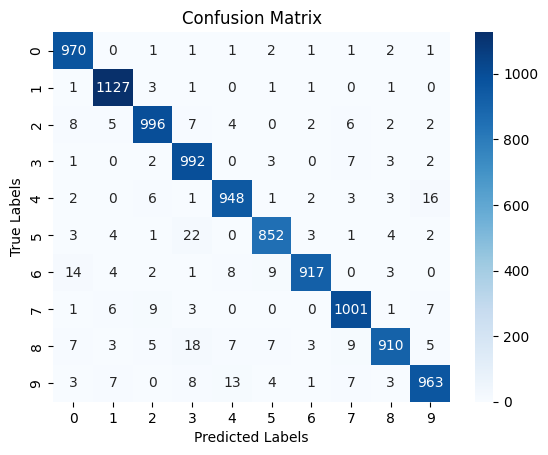

In [50]:
img=confusion_matrix(Y_test,Y_pred_label)
sns.heatmap(img,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

In [71]:
#Testing with external data

test=cv2.imread('/content/test6.png')
test.shape

(168, 170, 3)

This shape shows the image is a color image of size 433X433. So we need to convert it into gray image, resize it to 28X28 and scale it, reshape it before testing.

In [72]:
test_gray=cv2.cvtColor(test,cv2.COLOR_RGB2GRAY)
test_gray1=cv2.resize(test_gray,(28,28))
cv2_imshow(test_gray1)
test_grade_scaled=test_gray1/255
test_final=np.reshape(test_grade_scaled,[1,28,28])

In [73]:
Y_pred1=model.predict(test_final)
Y_pred1_label=np.argmax(Y_pred1)
print("The digit the model predicts is:",Y_pred1_label)

1/1 [==============================] - 0s 33ms/step
The digit the model predicts is: 6
